## Data Cleaning with Python Notebook

The following notebook is used as a entry level guide to data cleaning with Python.

### Step 1 - Import Libraries

The first step is the import of the libraries we will need for this tutorial.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import sqlite3 as sql

### Step 2 - Load data into Pandas

#### 2A - Load Data

In [2]:
# Read data from the CSV files
customers = pd.read_csv("customers.csv")

# Read data from a SQLite Database
con = sql.connect("remoteDB.db")
products = pd.read_sql_query("SELECT * from products", con)
purchases = pd.read_sql_query("SELECT * from purchases", con)
con.close()

# Print out the Data Structures
print(customers.head(5))
print("---------------------------------------- \n")
print(products.head(5))
print("---------------------------------------- \n")
print(purchases.head(5))
print("---------------------------------------- \n")

   id first_name   last_name                      email  gender  street_num  \
0   1     Romain   Southcott  rsouthcott0@clickbank.net    Male         1.0   
1   2     Cosimo   Molyneaux      cmolyneaux1@wiley.com    Male         NaN   
2   3      Bambi     Westrip     bwestrip2@symantec.com  Female      4057.0   
3   4     Roarke  Pankettman     rpankettman3@wiley.com    Male        74.0   
4   5    Mikaela    Althorpe           malthorpe4@51.la     NaN         NaN   

  street_name street_suffix         city       state  postcode  
0   Trailsway          Road    San Diego  California   92127.0  
1         NaN           NaN      El Paso       Texas       NaN  
2    Arkansas        Circle  San Antonio       Texas   78220.0  
3        Debs         Point      Memphis   Tennessee   38150.0  
4         2nd         Drive          NaN         NaN   83732.0  
---------------------------------------- 

   id                           product    cost   company
0   1              Liners - Baking

#### 2B - Basic Analysis

In [3]:
# Describe the Shape of the Data
print("Customers Details:")
print(customers.shape)
print(customers.dtypes)
print(customers.describe(include="all"))
print("--------------------------- \n")

print("Products shape: ")
print(products.shape)
print(products.dtypes)
print(products.describe(include="all"))
print("--------------------------- \n")

print("Purchases shape: ")
print(purchases.shape)
print(purchases.dtypes)
print(purchases.describe(include="all"))
print("--------------------------- \n")

Customers Details:
(1000, 11)
id                 int64
first_name        object
last_name         object
email             object
gender            object
street_num       float64
street_name       object
street_suffix     object
city              object
state             object
postcode         float64
dtype: object
                 id first_name last_name                 email gender  \
count   1000.000000       1000      1000                   878    957   
unique          NaN        932       993                   878      2   
top             NaN      Berty  Sedworth  acocking1u@wired.com   Male   
freq            NaN          4         3                     1    485   
mean     500.500000        NaN       NaN                   NaN    NaN   
std      288.819436        NaN       NaN                   NaN    NaN   
min        1.000000        NaN       NaN                   NaN    NaN   
25%      250.750000        NaN       NaN                   NaN    NaN   
50%      500.500000     

### Step 3 - Finding Missing Values

#### 3A - Remove Columns

In [4]:
customers.drop(columns='email', inplace=True)
customers.drop(columns='street_num', inplace=True)
customers.drop(columns='postcode', inplace=True)
customers.drop(columns='street_name', inplace=True)
customers.drop(columns='street_suffix', inplace=True)

customers.isnull().sum()

id             0
first_name     0
last_name      0
gender        43
city          79
state         80
dtype: int64

#### 3B - Remove Rows

In [5]:
customers.dropna(subset = ['city'], inplace=True)
customers.dropna(subset = ['state'], inplace=True)

print(customers.shape)
print(customers.isnull().sum())

(848, 6)
id             0
first_name     0
last_name      0
gender        38
city           0
state          0
dtype: int64


#### 3C - Replace Values

In [6]:
customers["gender"].fillna('Unspecified', inplace=True)
products["company"].fillna('Unspecified', inplace=True)

print(customers.shape)
print(customers.isnull().sum())
print(purchases.isnull().sum())
print(products.isnull().sum())

(848, 6)
id            0
first_name    0
last_name     0
gender        0
city          0
state         0
dtype: int64
id              0
purch_date      0
customer_num    0
product_num     0
amount          0
paid            0
dtype: int64
id         0
product    0
cost       0
company    0
dtype: int64


### Part 4 - Combine Data

In [7]:
combinedData = pd.merge(purchases, customers, left_on='customer_num', right_on='id', sort=False)
combinedData = pd.merge(combinedData, products, left_on='product_num', right_on='id', sort=False)
print(combinedData.head(5))
print(combinedData.shape)
print(purchases.shape)

   id_x  purch_date  customer_num  product_num amount     paid  id_y  \
0     1   3/01/2019           823           27     12  $568.92   823   
1  4565  04/27/2019           577           27      3  $142.23   577   
2  5421  05/26/2019           589           27      7  $331.87   589   
3  1954   4/11/2019            94           27      8  $208.64    94   
4  2777  03/23/2019           483           27     12  $568.92   483   

  first_name    last_name  gender            city      state  id  \
0   Eldredge    Columbell    Male   Pompano Beach    Florida  27   
1        Ree  Chippendale  Female  Jefferson City   Missouri  27   
2      Torry       Heimes    Male      Boca Raton    Florida  27   
3       Myra    Heningham  Female       Rochester  Minnesota  27   
4      Aleda      Euplate  Female           Tulsa   Oklahoma  27   

            product    cost      company  
0  Spaghetti Squash  $47.41  Unspecified  
1  Spaghetti Squash  $47.41  Unspecified  
2  Spaghetti Squash  $47.41  

### Part 5 - Cleaning up the DataFrame

#### 5A - Clean up columns

In [8]:
combinedData.drop(columns='customer_num', inplace=True)
combinedData.drop(columns='product_num', inplace=True)

combinedData = combinedData.rename(columns={'id_x':'purchase_id', 'id_y':'customer_id','id':'product_id'})

print(combinedData.head(100))

    purchase_id  purch_date amount     paid  customer_id first_name  \
0             1   3/01/2019     12  $568.92          823   Eldredge   
1          4565  04/27/2019      3  $142.23          577        Ree   
2          5421  05/26/2019      7  $331.87          589      Torry   
3          1954   4/11/2019      8  $208.64           94       Myra   
4          2777  03/23/2019     12  $568.92          483      Aleda   
..          ...         ...    ...      ...          ...        ...   
95         3226  03/27/2019      4  $189.64          397     Sophie   
96          314   5/02/2019      9  $367.74          823   Eldredge   
97          921   6/05/2019      6  $255.36          606    Beitris   
98         4155  04/21/2019      2   $85.12          577        Ree   
99          229   6/01/2019     10  $425.60          456   Violette   

      last_name  gender            city      state  product_id  \
0     Columbell    Male   Pompano Beach    Florida          27   
1   Chippendale

#### 5B - Find inconsistentcies

In [9]:
print(combinedData.dtypes)
print(combinedData.head(2))

purchase_id     int64
purch_date     object
amount         object
paid           object
customer_id     int64
first_name     object
last_name      object
gender         object
city           object
state          object
product_id      int64
product        object
cost           object
company        object
dtype: object
   purchase_id  purch_date amount     paid  customer_id first_name  \
0            1   3/01/2019     12  $568.92          823   Eldredge   
1         4565  04/27/2019      3  $142.23          577        Ree   

     last_name  gender            city     state  product_id  \
0    Columbell    Male   Pompano Beach   Florida          27   
1  Chippendale  Female  Jefferson City  Missouri          27   

            product    cost      company  
0  Spaghetti Squash  $47.41  Unspecified  
1  Spaghetti Squash  $47.41  Unspecified  


In [10]:
combinedData.paid = combinedData['paid'].str.replace('$','')
combinedData.cost = combinedData['cost'].str.replace('$','')
combinedData.paid = combinedData['paid'].str.replace(',','')
combinedData.cost = combinedData['cost'].str.replace(',','')

combinedData.purch_date = pd.to_datetime(combinedData['purch_date'], errors='coerce')
combinedData.amount = pd.to_numeric(combinedData['amount'], errors='coerce')
combinedData.paid = pd.to_numeric(combinedData['paid'], errors='coerce')
combinedData.cost = pd.to_numeric(combinedData['cost'], errors='coerce')

combinedData.dropna(subset = ['amount'], inplace=True)

print(combinedData.isnull().sum())
print(combinedData.shape)
print(combinedData.dtypes)

purchase_id    0
purch_date     0
amount         0
paid           0
customer_id    0
first_name     0
last_name      0
gender         0
city           0
state          0
product_id     0
product        0
cost           0
company        0
dtype: int64
(5067, 14)
purchase_id             int64
purch_date     datetime64[ns]
amount                float64
paid                  float64
customer_id             int64
first_name             object
last_name              object
gender                 object
city                   object
state                  object
product_id              int64
product                object
cost                  float64
company                object
dtype: object


### Part 6 - Reshaping Data

#### 6A - Pivot DataFrame

In [11]:
reshapedData = combinedData.pivot_table(index=['product_id', 'product'], columns='state', values='paid', aggfunc=np.sum)
reshapedData = reshapedData.fillna(0)
print(reshapedData.head(10))

state                                          Alabama   Alaska  Arizona  \
product_id product                                                         
1          Liners - Baking Cups                   0.00     0.00    25.44   
2          Nori Sea Weed - Gold Label          1629.06  1957.44   919.20   
3          Bar Bran Honey Nut                  2550.60   826.64  1242.60   
4          Soup - Campbells Beef Stew           340.80   858.75   477.12   
5          Wine - Shiraz Wolf Blass Premium    1382.43   786.51  2184.75   
6          Wine - White, Riesling, Semi - Dry  3175.04  1984.40  1488.30   
7          Brandy - Bar                         431.16    62.93   530.34   
8          Onions - White                         0.00   675.04   717.23   
9          Lettuce - Baby Salad Greens          180.06    90.03     0.00   
10         Sambuca - Ramazzotti                1470.11     0.00     0.00   

state                                          Arkansas  California  Colorado  \
produc

#### 6B - Group By and Sum

In [12]:
volumesData = combinedData.groupby(by=['customer_id','first_name','last_name','product_id','product']).sum()
volumesData.drop(columns='purchase_id', inplace=True)
print(volumesData.head(10))

                                                                            amount  \
customer_id first_name last_name product_id product                                  
1           Romain     Southcott 19         Loaf Pan - 2 Lb, Foil              5.0   
                                 28         Wine - Niagara,vqa Reisling       13.0   
                                 41         Squash - Acorn                     5.0   
                                 54         Plate - Foam, Bread And Butter     1.0   
2           Cosimo     Molyneaux 11         Coffee - Decafenated               5.0   
                                 20         Bagel - Everything Presliced       2.0   
                                 21         Bagel - Whole White Sesame        20.0   
                                 23         Puree - Blackcurrant              16.0   
                                 33         Duck - Legs                        5.0   
                                 50         Silicone P

In [13]:
totalsData = combinedData.groupby(by='state').sum().reset_index()
totalsData.drop(columns=['purchase_id','customer_id','product_id'], inplace=True)
print(totalsData.head(10))

                  state  amount       paid      cost
0               Alabama   967.0   56519.13   5294.90
1                Alaska   513.0   27186.55   2430.31
2               Arizona   736.0   40363.29   4256.40
3              Arkansas   403.0   21333.09   1849.86
4            California  5595.0  297546.31  29974.50
5              Colorado  1037.0   51824.51   5148.72
6           Connecticut   623.0   29575.52   2969.43
7              Delaware   296.0   12884.95   1390.68
8  District of Columbia  1660.0   88180.03   9052.18
9               Florida  4065.0  201024.66  21380.35


### Part 8 - Visualizations

#### 8A - Bar Charts

[Text(0, 0, 'Alabama'),
 Text(0, 0, 'Alaska'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Delaware'),
 Text(0, 0, 'District of Columbia'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Hawaii'),
 Text(0, 0, 'Idaho'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Maine'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Montana'),
 Text(0, 0, 'Nebraska'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'New Mexico'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'North Dakota'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oklahoma'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Pennsylvania'),
 Text

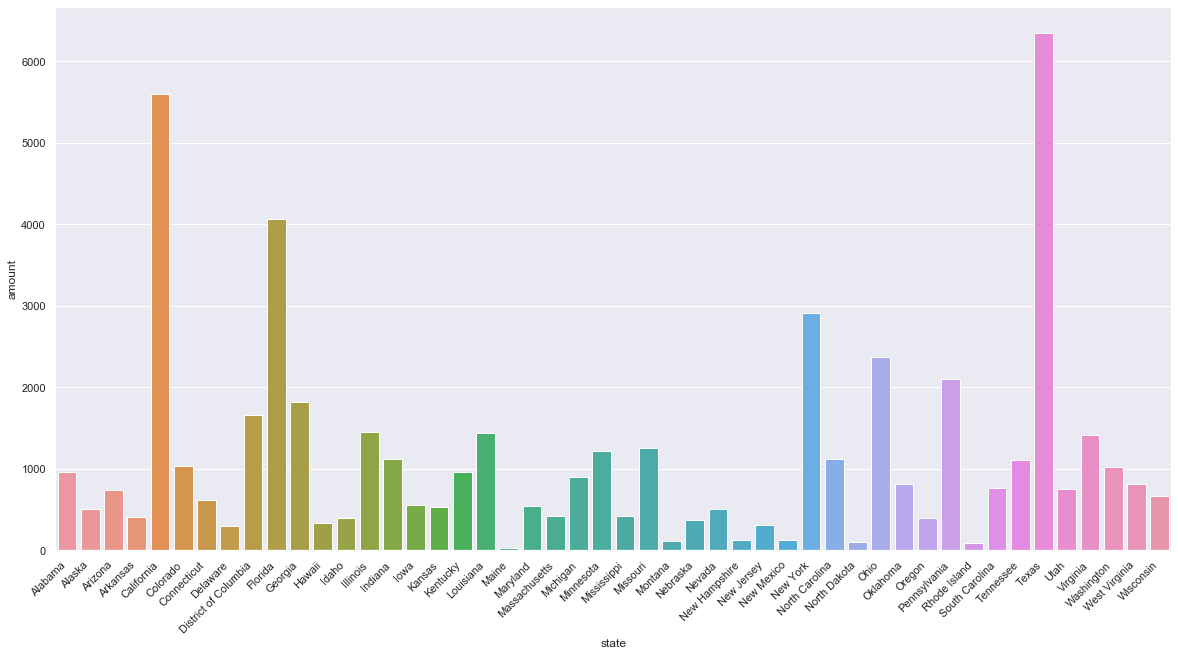

In [14]:
plt.figure(figsize=(20,10))
stateTotalsChart = sns.barplot(data=totalsData, x='state',y='amount')
stateTotalsChart.set_xticklabels(stateTotalsChart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### 8B - Line Charts

In [15]:
purchasesByDay = combinedData.groupby(by='purch_date').sum().reset_index()
purchasesByDay.drop(columns=['purchase_id','customer_id','product_id'], inplace=True)
print(purchasesByDay.head(10))

  purch_date  amount      paid     cost
0 2019-03-01   422.0  19128.27  2014.65
1 2019-03-02   488.0  24629.88  2239.34
2 2019-03-03   473.0  24459.16  2058.73
3 2019-03-04   447.0  23859.37  1955.55
4 2019-03-05   279.0  14423.21  1352.08
5 2019-03-06   448.0  23312.47  2388.39
6 2019-03-07   332.0  19678.01  1611.28
7 2019-03-08   453.0  23463.04  2341.59
8 2019-03-09   477.0  23426.75  2588.32
9 2019-03-10   479.0  28439.95  2712.51


E:\Development\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


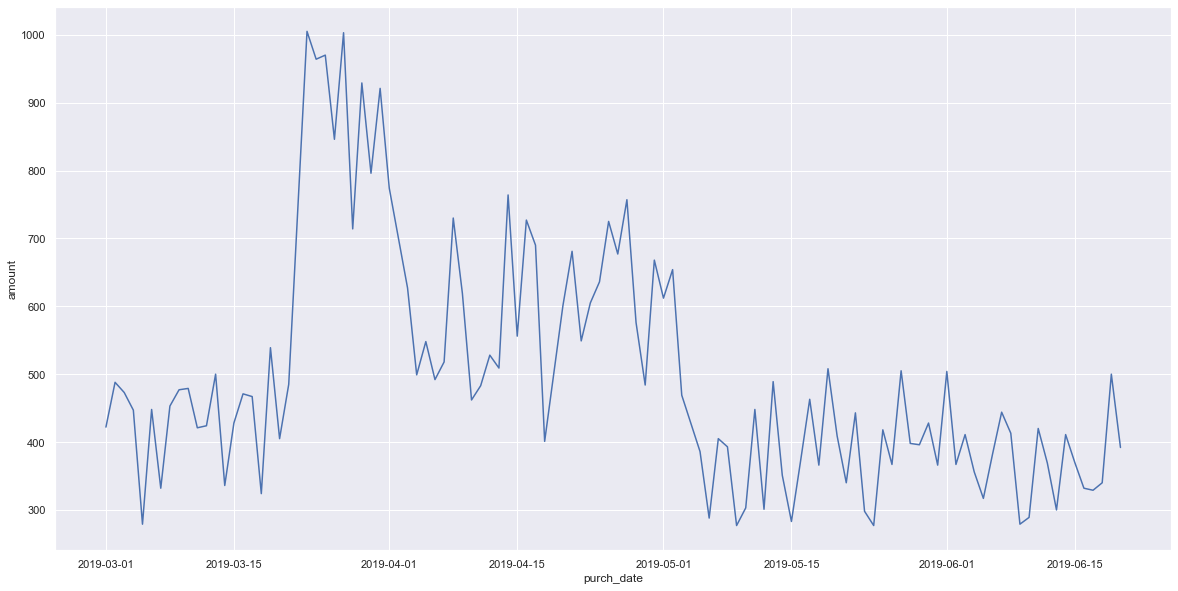

In [16]:
plt.figure(figsize=(20,10))
dailyTotalsChart = sns.lineplot(data=purchasesByDay, x='purch_date',y='amount')